In [1]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
# Probability that 1 was sent
P1S = 0.488
# Probability that 0 was sent
P0S = 0.512
# Probability that 0 was received given that 1 was sent
P0R1S = 0.025
# Probability that 0 was received given that 0 was sent
P0R0S = 0.975
# Probability that 1 was received given that 0 was sent
P1R0S = 0.025
# Probability that 1 was received given that 1 was sent
P1R1S = 0.975

In [3]:
## PART 2

# Define function that simulates channel
def transmit(sentBit):
    if sentBit:
        return bernoulli.rvs(P1R1S, size = 1)[0]
    return bernoulli.rvs(P1R0S, size = 1)[0]

In [4]:
# Define function to run experiment
def runExperiment(n):
    # Number of times 1 was sent
    num1S = 0
    # Number of times 1 was received
    num1R = 0
    # Number of times 1 was sent and 1 was received
    num1S1R = 0
    # Number of times 0 was sent and 1 was received
    num0S1R = 0
    # Number of times 1 was sent and 0 was received
    num1S0R = 0
    # Number of times 0 was sent and 0 was received
    num0S0R = 0

    # Run experiment for n trials
    for i in range(n):
        ## PART 1
        # Sent bit
        sBit = bernoulli.rvs(P1S, size = 1)[0]
        # Received bit
        rBit = transmit(sBit)
        
        # Increment appropriate counters
        if sBit and rBit:
            num1S += 1
            num1R += 1
            num1S1R += 1
        elif (not sBit) and rBit:
            num1R += 1
            num0S1R += 1
        elif sBit and (not rBit):
            num1S += 1
            num1S0R += 1
        else:
            num0S0R += 1

    # Compute number of times 0 was sent
    num0S = n - num1S
    # Compute number of times 1 was received
    num0R = n - num1R
    
    # Note: We probably don't have to worry about dividing by 0 because num_trials is so large.
    
    print('Number of trials:', n)
    
    ## PART 4
    
    # Compute actual value of P(0S|0R)
    actualP0S0R = num0S0R / num0R
    print('Actual P(0S|0R):', actualP0S0R)
    
    # Compute actual value of P(1S|1R)
    actualP1S1R = num1S1R / num1R
    print('Actual P(1S|1R):', actualP1S1R)
    
    # Compute actual value of Perr
    actualPerr = (num1S0R + num0S1R) / n
    print('Actual Perr:', actualPerr)
    
    print()
    
    return actualP0S0R, actualP1S1R, actualPerr

Theoretical P(0S|0R): 0.9761439186546734
Theoretical P(1S|1R): 0.9738027015963979
Theoretical Perr: 0.025

Number of trials: 128
Actual P(0S|0R): 0.971830985915493
Actual P(1S|1R): 0.9649122807017544
Actual Perr: 0.03125

Number of trials: 256
Actual P(0S|0R): 0.9836065573770492
Actual P(1S|1R): 0.9477611940298507
Actual Perr: 0.03515625

Number of trials: 512
Actual P(0S|0R): 0.974910394265233
Actual P(1S|1R): 0.9527896995708155
Actual Perr: 0.03515625

Number of trials: 1024
Actual P(0S|0R): 0.9749518304431599
Actual P(1S|1R): 0.9861386138613861
Actual Perr: 0.01953125

Number of trials: 2048
Actual P(0S|0R): 0.9774647887323944
Actual P(1S|1R): 0.9694811800610377
Actual Perr: 0.0263671875

Number of trials: 4096
Actual P(0S|0R): 0.983739837398374
Actual P(1S|1R): 0.9680798004987531
Actual Perr: 0.02392578125

Number of trials: 8192
Actual P(0S|0R): 0.9741131351869607
Actual P(1S|1R): 0.9718905472636816
Actual Perr: 0.0269775390625

Number of trials: 16384
Actual P(0S|0R): 0.976463560

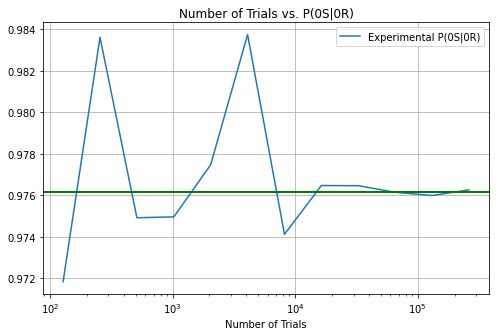

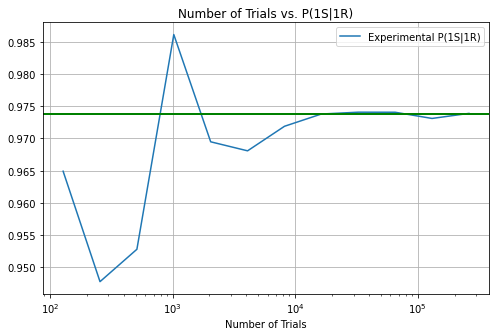

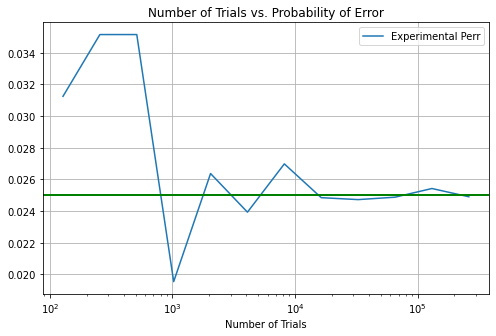

In [5]:
## PART 3

# Compute probability that 1 was received
P1R = (P1R1S * P1S) + (P1R0S * P0S)
# Computer probability that 0 was received
P0R = (P0R1S * P1S) + (P0R0S * P0S)

# Compute theoretical value of P(0S|0R)
theoreticalP0S0R = (P0S * P0R0S) / P0R
print('Theoretical P(0S|0R):', theoreticalP0S0R)

# Compute theoretical value of P(1S|1R)
theoreticalP1S1R = (P1S * P1R1S) / P1R
print('Theoretical P(1S|1R):', theoreticalP1S1R)

# Compute theoretical value of Perr
theoreticalPerr = (P0R1S * P1S) + (P1R0S * P0S)
print('Theoretical Perr:', theoreticalPerr)

print()

# Create list to serve as dataframe when plotting
data = []
for i in range(7, 19):
    # Create list to serve as row of dataframe
    row = []
    num_trials = 2**i
    expP0S0R, expP1S1R, expPerr  = runExperiment(num_trials)
    # Append values to row
    row.append(num_trials)
    row.append(expP0S0R)
    row.append(expP1S1R)
    row.append(expPerr)
    # Append row to dataframe
    data.append(row)
    
colNames = ['Number of Trials', 'Experimental P(0S|0R)', 'Experimental P(1S|1R)', 'Experimental Perr']
df = pd.DataFrame(data, columns = colNames) 

## PART 5
# Plot Number of Trials vs. P(0S|0R)
fig1, ax1 = plt.subplots(figsize=(8,5))
df.plot(x = 'Number of Trials', y = 'Experimental P(0S|0R)', title = 'Number of Trials vs. P(0S|0R)', grid = True, logx = True, fontsize = 10, ax = ax1) 
ax1.axhline(theoreticalP0S0R, color ='green', lw = 2)
fig1.savefig('Num_Trials_vs_P0S0R.png')

# Plot Number of Trials vs. P(1S|1R)
fig2, ax2 = plt.subplots(figsize=(8,5))
df.plot(x = 'Number of Trials', y = 'Experimental P(1S|1R)', title = 'Number of Trials vs. P(1S|1R)', grid = True, logx = True, fontsize = 10, ax = ax2) 
ax2.axhline(theoreticalP1S1R, color ='green', lw = 2)
fig2.savefig('Num_Trials_vs_P1S1R.png')

# Plot Number of Trials vs. Probability of Error
fig3, ax3 = plt.subplots(figsize=(8,5))
df.plot(x = 'Number of Trials', y = 'Experimental Perr', title = 'Number of Trials vs. Probability of Error', grid = True, logx = True, fontsize = 10, ax = ax3) 
ax3.axhline(theoreticalPerr, color ='green', lw = 2)
fig3.savefig('Num_Trials_vs_Perr.png')